In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import sys
import seaborn as sns
import datetime
import re
import gc 

In [2]:
data_file = '../data/Data Science Assignment.xlsx'
ips_data = pd.read_excel(data_file,sheet=1)
print ips_data.shape
ips_data.head()

(8000, 34)


,dir,local_ip,lp,mod,nm,prod,productId,protocol,ref,remote_ip,...,product_name,product_version,sp_major_version,sp_minor_version,trial_copy,vdb_timestamp,vertical_id,city_name,country_name,real_region_name
0,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,NaN,90.811.108.100,...,qhpname3,qhpver0,0,0,0,"01 March, 2019 (08:08:51)",government,city141,country4,region31
1,in,83.131.177.201,734034,blk,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,NaN,19.131.177.921.,...,qhpname6,qhpver0,3,0,0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
2,in,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt4,NaN,NaN,90.811.108.100,...,qhpname3,qhpver0,0,0,0,"01 March, 2019 (08:08:51)",finance,city141,country4,region31
3,in,83.131.177.277,734034,abc,SMB/EternalBlue.UN!SP.31780,UN,qhpdt6,SMB,NaN,19.131.177.921.,...,qhpname6,qhpver0,3,0,0,"01 March, 2019 (08:08:31)",it,city170,country4,region40
4,in,109.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,qhpdt9,NaN,NaN,10.195.154.98,...,qhpname7,qhpver0,1,0,0,"03 March, 2019 (08:09:50)",finance,city-1,country4,region-1


In [3]:
ips_data.columns

Index([u'dir', u'local_ip', u'lp', u'mod', u'nm', u'prod', u'productId',
       u'protocol', u'ref', u'remote_ip', u'rp', u'sigid', u'sigwid',
       u'timestamp', u'ua', u'url', u'company_name', u'cust_id',
       u'last_vdb_timestamp', u'machine_type', u'os_arch', u'os_id',
       u'os_name', u'pkhash', u'product_name', u'product_version',
       u'sp_major_version', u'sp_minor_version', u'trial_copy',
       u'vdb_timestamp', u'vertical_id', u'city_name', u'country_name',
       u'real_region_name'],
      dtype='object')

In [4]:
 #percentage of missing values in each column
ips_data.isnull().sum()/len(ips_data.index)*100

dir                    0.0125
local_ip               0.0125
lp                     0.0125
mod                    0.0125
nm                     0.0125
prod                   5.4625
productId              0.0125
protocol               5.4625
ref                   99.9750
remote_ip              0.0125
rp                     0.0125
sigid                  5.4625
sigwid                 0.0125
timestamp              0.0125
ua                    99.8000
url                   99.8125
company_name           0.0125
cust_id                0.0875
last_vdb_timestamp     0.0125
machine_type           6.0750
os_arch                6.0750
os_id                  6.0750
os_name                6.0750
pkhash                 0.0125
product_name           0.0125
product_version        0.0125
sp_major_version       6.0750
sp_minor_version       6.0750
trial_copy             6.0750
vdb_timestamp          0.0125
vertical_id            6.3000
city_name              0.0125
country_name           0.0125
real_regio

In [5]:
missing_cols = ips_data.columns[ips_data.isnull().sum()/len(ips_data.index)*100 >99]
missing_cols

Index([u'ref', u'ua', u'url'], dtype='object')

In [6]:
ips_data = ips_data.drop(missing_cols,axis=1)
ips_data.shape

(8000, 31)

In [7]:
# Lets Consider only those columns which can-not be empty and remove the remaining columns 
# Will assume if these values are empty any the quality of the data is affected
imp_ipc_cols = ['local_ip','lp','mod','nm','protocol','remote_ip','sigid','timestamp','cust_id',
                'product_name','pkhash','product_version','trial_copy']
imp_ipc_data = ips_data[imp_ipc_cols]
imp_ipc_data.head()

,local_ip,lp,mod,nm,protocol,remote_ip,sigid,timestamp,cust_id,product_name,pkhash,product_version,trial_copy
0,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,90.811.108.100,NaN,2019-03-01T14:34:51.000Z,4e4789c041c1d9517f0b5648b3366a,qhpname3,7fb5ef7c0113bd557ada5c0445ec91,qhpver0,0
1,83.131.177.201,734034,blk,SMB/EternalBlue.UN!SP.31780,SMB,19.131.177.921.,31780,2019-03-01T14:34:51.000Z,7a30bd86e7d0a29a98244774cb2d2b7a,qhpname6,5194279487c0779a605e969aa950d338,qhpver0,0
2,124.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,90.811.108.100,NaN,2019-03-01T14:34:51.000Z,4e4789c041c1d9517f0b5648b3366a,qhpname3,7fb5ef7c0113bd557ada5c0445ec91,qhpver0,0
3,83.131.177.277,734034,abc,SMB/EternalBlue.UN!SP.31780,SMB,19.131.177.921.,31780,2019-03-01T14:34:51.000Z,7a30bd86e7d0a29a98244774cb2d2b7a,qhpname6,5194279487c0779a605e969aa950d338,qhpver0,0
4,109.9.177.201,94444,blk,jjjjjjjjjjjjjjjjjjj,NaN,10.195.154.98,NaN,2019-03-04T06:27:25.000Z,8435d926acff7568edb434b5abdd917a,qhpname7,df4c090f2a82fc8323f90bb6ee374c19,qhpver0,0


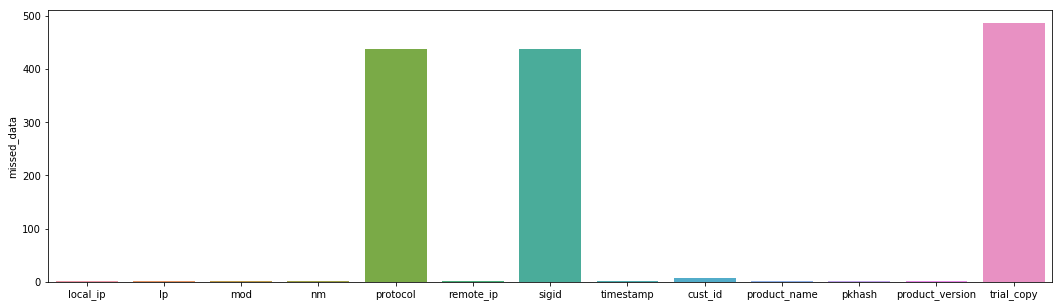

In [8]:
dims = (18,5)

null_df = pd.DataFrame(imp_ipc_data.isnull().sum(),columns=['missed_data'])
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x=null_df.index, y='missed_data', data=null_df,ax=ax)
plt.show()

In [9]:
def get_nullinfo(df,cols):
    null_dict ={}
    for column_name in cols:
        null_data = imp_ipc_data.loc[imp_ipc_data[column_name].isnull()]
        index = list(null_data.index )
        null_dict[column_name]=index
  
    return null_dict 


null_columns =  imp_ipc_data.columns[(imp_ipc_data.isnull().sum()) > 2]
null_dict = get_nullinfo(imp_ipc_data,null_columns)

null_data = imp_ipc_data[imp_ipc_data.isnull().any(axis=1)][null_columns]

for key in get_nullinfo(imp_ipc_data,null_columns):
    print "Field ID:{}".format(key)
    print "Number of id's {}".format(len(null_dict[key]))
    print "Missing Field {} ,ID {}".format(key,null_dict[key])


Field ID:cust_id
Number of id's 7
Missing Field cust_id ,ID [6140, 7710, 7711, 7712, 7713, 7714, 7715]
Field ID:trial_copy
Number of id's 486
Missing Field trial_copy ,ID [501, 512, 584, 585, 596, 597, 608, 609, 620, 621, 622, 638, 693, 703, 715, 725, 891, 902, 978, 998, 1042, 1045, 1057, 1060, 1069, 1080, 1114, 1126, 1175, 1194, 1195, 1198, 1217, 1218, 1226, 1233, 1248, 1264, 1342, 1343, 1382, 1383, 1384, 1423, 1425, 1428, 1429, 1430, 1437, 1440, 1441, 1442, 1468, 1494, 1663, 1674, 1702, 1709, 1714, 1731, 1749, 1761, 1782, 1783, 1790, 1793, 1794, 1801, 1852, 1853, 1858, 1859, 1869, 2007, 2144, 2156, 2268, 2318, 2327, 2329, 2330, 2344, 2346, 2347, 2357, 2358, 2433, 2434, 2526, 2539, 2550, 2551, 2561, 2562, 2607, 2611, 2620, 2624, 2633, 2705, 2777, 2783, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 28

In [10]:
print null_data.shape
null_data.head()

(911, 4)


,protocol,sigid,cust_id,trial_copy
0,NaN,NaN,4e4789c041c1d9517f0b5648b3366a,0
2,NaN,NaN,4e4789c041c1d9517f0b5648b3366a,0
4,NaN,NaN,8435d926acff7568edb434b5abdd917a,0
5,NaN,NaN,aba630477ff23c2df39e01d7b247d800,0
20,NaN,NaN,8435d926acff7568edb434b5abdd917a,0


In [11]:
imp_ipc_data.dropna(axis=0, thresh=7, subset=None, inplace=True)
imp_ipc_data.shape

/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(7999, 13)

In [12]:
# Analysis for local_ip
null_ip = imp_ipc_data.loc[imp_ipc_data.local_ip.isnull() == True]

imp_ipc_data['local_ip'] = imp_ipc_data.local_ip.apply(lambda x: str(x))
if len(null_ip.index.value_counts()) ==0 :
    print "No null values in IP "
else : 
    print "Ip_values having null indexes "
    print null_ip.index
       
# check if any col do not follow IP convention 
def check_ip(ip_df,verbose=False):
    # Analysois for local_ip
    import socket
    iperr_idx = []
    for ip_index,ip in enumerate(ip_data):
        try:
            socket.inet_aton(ip)
        except socket.error:
            if verbose:
                print "ip error at ",ip_index
            iperr_idx.append(ip_index)
    return iperr_idx

def remove_points(df , invalid_cols):
    df_list = np.asarray(df)
    df_valid = np.delete(df_list, invalid_cols)
    return df_valid 

ip_data = imp_ipc_data['local_ip']
print "Indexes having IP error :"
iperr_idx = check_ip(ip_data) # enable verbose to see the results 
print iperr_idx

No null values in IP 
Indexes having IP error :
[3, 5, 8, 11, 12, 13, 15, 17, 18, 19, 20, 24, 28, 33, 34, 35, 43, 60, 61, 116, 118, 137, 138, 193, 195, 212, 213, 214, 219, 223, 229, 230, 231, 236, 240, 260, 279, 285, 286, 296, 297, 298, 300, 301, 311, 312, 313, 315, 316, 392, 393, 471, 472, 483, 484, 499, 510, 526, 545, 557, 568, 625, 641, 675, 684, 690, 697, 700, 707, 884, 885, 895, 896, 946, 962, 974, 988, 994, 1008, 1041, 1056, 1097, 1098, 1108, 1109, 1118, 1121, 1122, 1123, 1130, 1133, 1134, 1135, 1145, 1156, 1166, 1178, 1201, 1222, 1229, 1269, 1270, 1271, 1272, 1278, 1279, 1285, 1286, 1287, 1288, 1294, 1295, 1300, 1301, 1311, 1312, 1322, 1333, 1343, 1384, 1424, 1436, 1495, 1502, 1503, 1510, 1511, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1

/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
# Analysis for LP
lp_df = imp_ipc_data.loc[imp_ipc_data['lp'].isnull() == True]
if len(lp_df.index) == 0:
    print "No null values in lp"
else : 
    print "Null values in lp"
    print lp_df.index

print "Local port only accepts integer value and not alpha"
lp_invalid = list(imp_ipc_data.lp.loc[imp_ipc_data.lp.str.isalpha() == True].index)

print "indexes for lp values having alpha {}".format(lp_invalid)

# for i in lp_invalid:
#     print i , imp_ipc_data.lp.loc[i]

lp_val = remove_points(imp_ipc_data.lp,lp_invalid)
lp_data = []
# convert individual values in lp_val as int 
for i,val in enumerate(lp_val):
    try : 
        lp_data.append(int(val))
    except:
        pass

No null values in lp
Local port only accepts integer value and not alpha
indexes for lp values having alpha [435, 6535, 7860]


In [14]:
# analysis for mod
mod_df = imp_ipc_data['mod'].loc[imp_ipc_data['mod'].isnull() == True]

imp_ipc_data['mod']=  list(map( lambda x: str(x),imp_ipc_data['mod']))

if len(mod_df.index) == 0:
    print "No null values in mod"
else : 
    print "Null values in mod"
    print mod_df.index

# print imp_ipc_data[imp_ipc_data['mod'] != 'blk'].index  
# print imp_ipc_data[imp_ipc_data['mod'] != 'mon'].index
print " indexs which do not contain blk and mon as mod can only have these two values only "
invalid_mod = list (imp_ipc_data[imp_ipc_data['mod'] != 'blk'].index & imp_ipc_data[imp_ipc_data['mod'] != 'mon'].index)

for i in invalid_mod:
    print i , imp_ipc_data['mod'].loc[i]

mod_val = remove_points(imp_ipc_data['mod'],invalid_mod)
mod_data = map(lambda x: 1 if x =='blk' else 0,mod_val)

No null values in mod
 indexs which do not contain blk and mon as mod can only have these two values only 
3 abc
59 888
66 xyz
141 def
337 jjkjkjljklj
555 khjklhlj
779 asdfasd
1078 uiuiyiuyo
1287 sdfsd
1640 iiii
1875 kkkkk
2078 ppppp
2079 ppppp
2080 jkhjkh
2081 ttt
2283 nnn
2284 nnn
2502 jklhkl
2705 mmm
2706 mmm
2847 jlk;
2928 sdfds
3070 sdfds
3154 yuio
3258 hjklsdf
3455 uibhjhjhk
3576 fff
3789 dff
3905 ddd
4007 dfs
4122 df
4286 fdsf
6139 sdf
6313 dfs
6690 sdf
6808 ffff
7101 tttt
7437 ffff
7860 kjl
7944 rrr


/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
# Analyis for nm
nm_df = imp_ipc_data['nm'].loc[imp_ipc_data['nm'].isnull() == True]
pattern = '[A-Z]'
if len(nm_df.index) == 0:
    print "No null values in nm"
else : 
    print "Null values in found in nm"
    print nm_df.index
    
nm_data = list(imp_ipc_data.nm.apply(lambda x: str(x)))

for nm_idx , nm_val in enumerate(nm_data):
    if bool(re.search(pattern,nm_val))== False and 'SMB' not in nm_val and 'HTTP' not in nm_val:
        print nm_idx , nm_val


No null values in nm
0 jjjjjjjjjjjjjjjjjjj
2 jjjjjjjjjjjjjjjjjjj
4 jjjjjjjjjjjjjjjjjjj
5 jjjjjjjjjjjjjjjjjjj
20 jjjjjjjjjjjjjjjjjjj
21 jjjjjjjjjjjjjjjjjjj
58 jjjjjjjjjjjjjjjjjjj
135 jjjjjjjjjjjjjjjjjjj
246 jjjjjjjjjjjjjjjjjjj
247 jjjjjjjjjjjjjjjjjjj
265 jjjjjjjjjjjjjjjjjjj
266 jjjjjjjjjjjjjjjjjjj
284 jjjjjjjjjjjjjjjjjjj
299 jjjjjjjjjjjjjjjjjjj
468 jjjjjjjjjjjjjjjjjjj
469 jjjjjjjjjjjjjjjjjjj
480 jjjjjjjjjjjjjjjjjjj
481 jjjjjjjjjjjjjjjjjjj
492 jjjjjjjjjjjjjjjjjjj
503 jjjjjjjjjjjjjjjjjjj
552 jjjjjjjjjjjjjjjjjjj
553 jjjjjjjjjjjjjjjjjjj
554 jjjjjjjjjjjjjjjjjjj
563 jjjjjjjjjjjjjjjjjjj
564 jjjjjjjjjjjjjjjjjjj
565 jjjjjjjjjjjjjjjjjjj
574 jjjjjjjjjjjjjjjjjjj
575 jjjjjjjjjjjjjjjjjjj
586 jjjjjjjjjjjjjjjjjjj
587 jjjjjjjjjjjjjjjjjjj
598 jjjjjjjjjjjjjjjjjjj
599 jjjjjjjjjjjjjjjjjjj
610 jjjjjjjjjjjjjjjjjjj
611 jjjjjjjjjjjjjjjjjjj
622 jjjjjjjjjjjjjjjjjjj
623 jjjjjjjjjjjjjjjjjjj
638 jjjjjjjjjjjjjjjjjjj
639 jjjjjjjjjjjjjjjjjjj
742 jjjjjjjjjjjjjjjjjjj
812 jjjjjjjjjjjjjjjjjjj
920 jjjjjjjjjjjjjjjjjjj
921 jj

In [16]:
# Analysis for Protocol
# imp_ipc_datac
protocol_null = imp_ipc_data['protocol'].loc[imp_ipc_data.protocol.isnull() == True ]
if len(protocol_null.index) == 0:
    print "No null values in protocol"
else : 
    print "Null values indexs protocol"
    print list(protocol_null.index)
#protocol_null.index
    protocol_df = imp_ipc_data['protocol'].loc[imp_ipc_data.protocol.isnull() == False]
print "Non Alphanumeric chars in protocol =",len(protocol_df[protocol_df.str.isalpha()==False].index)

if len(protocol_df[protocol_df.str.isalpha()==False].index)>0:
    print list(protocol_df[protocol_df.str.isalpha()==False].index)
protocol_data = protocol_df.apply(lambda x: 0 if x=='SMB' else 1 )

Null values indexs protocol
[0, 2, 4, 5, 20, 21, 58, 135, 246, 247, 265, 266, 284, 299, 468, 469, 480, 481, 492, 503, 552, 553, 554, 563, 564, 565, 574, 575, 586, 587, 598, 599, 610, 611, 622, 623, 638, 639, 742, 812, 920, 921, 930, 931, 940, 941, 942, 956, 957, 958, 972, 973, 992, 993, 1038, 1053, 1068, 1079, 1090, 1101, 1112, 1124, 1136, 1137, 1145, 1146, 1154, 1164, 1174, 1175, 1197, 1198, 1220, 1227, 1234, 1250, 1266, 1267, 1268, 1282, 1283, 1284, 1298, 1299, 1309, 1310, 1320, 1321, 1331, 1332, 1342, 1383, 1424, 1436, 1500, 1501, 1508, 1509, 1662, 1663, 1664, 1673, 1674, 1675, 1684, 1685, 1690, 1691, 1696, 1697, 1703, 1704, 1768, 1769, 1775, 1776, 1804, 1817, 1830, 1839, 1860, 1861, 1998, 1999, 2136, 2148, 2354, 2355, 2430, 2431, 2506, 2514, 2522, 2535, 2570, 2571, 2572, 2588, 2589, 2590, 2606, 2619, 2788, 2796, 2822, 2823, 2897, 2898, 2972, 2979, 2986, 2993, 3000, 3001, 3010, 3011, 3058, 3059, 3060, 3070, 3071, 3072, 3082, 3083, 3084, 3085, 3090, 3091, 3092, 3093, 3132, 3140, 3186

In [17]:
#Analysis for remote_ip
remoteip_null = imp_ipc_data['remote_ip'].loc[imp_ipc_data.remote_ip.isnull() == True]
if len(remoteip_null.index) == 0:
    print "No null values in remote_ip"
else : 
    print "Null values indexs remote_ip"
    print list(remoteip_null.index)
    
rmtip_data = imp_ipc_data['remote_ip']
invalid_remtip = check_ip(rmtip_data)
print "Indexes having IP error :"
print invalid_remtip

No null values in remote_ip
Indexes having IP error :
[3, 5, 8, 11, 12, 13, 15, 17, 18, 19, 20, 24, 28, 33, 34, 35, 43, 60, 61, 116, 118, 137, 138, 193, 195, 212, 213, 214, 219, 223, 229, 230, 231, 236, 240, 260, 279, 285, 286, 296, 297, 298, 300, 301, 311, 312, 313, 315, 316, 392, 393, 471, 472, 483, 484, 499, 510, 526, 545, 557, 568, 625, 641, 675, 684, 690, 697, 700, 707, 884, 885, 895, 896, 946, 962, 974, 988, 994, 1008, 1041, 1056, 1097, 1098, 1108, 1109, 1118, 1121, 1122, 1123, 1130, 1133, 1134, 1135, 1145, 1156, 1166, 1178, 1201, 1222, 1229, 1269, 1270, 1271, 1272, 1278, 1279, 1285, 1286, 1287, 1288, 1294, 1295, 1300, 1301, 1311, 1312, 1322, 1333, 1343, 1384, 1424, 1436, 1495, 1502, 1503, 1510, 1511, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1

In [18]:
# Analysis for SigId
sigid_null = imp_ipc_data['sigid'].loc[imp_ipc_data.sigid.isnull() == True]

if len(sigid_null.index) == 0:
    print "No null values in Sigid"
else : 
    print "Null values indexs Sigid"
    print list(sigid_null.index)
    sigid_df = imp_ipc_data['sigid'].loc[imp_ipc_data.sigid.isnull() == False]
invalid_sigid = list(imp_ipc_data.sigid.loc[imp_ipc_data.sigid.str.isalpha() == True].index)
print "Local port only accepts integer value and not alpha"
print "indexes for lp values having alpha {}".format(list(imp_ipc_data.sigid.loc[imp_ipc_data.sigid.str.isalpha() == True].index))

Null values indexs Sigid
[0, 2, 4, 5, 20, 21, 58, 135, 246, 247, 265, 266, 284, 299, 468, 469, 480, 481, 492, 503, 552, 553, 554, 563, 564, 565, 574, 575, 586, 587, 598, 599, 610, 611, 622, 623, 638, 639, 742, 812, 920, 921, 930, 931, 940, 941, 942, 956, 957, 958, 972, 973, 992, 993, 1038, 1053, 1068, 1079, 1090, 1101, 1112, 1124, 1136, 1137, 1145, 1146, 1154, 1164, 1174, 1175, 1197, 1198, 1220, 1227, 1234, 1250, 1266, 1267, 1268, 1282, 1283, 1284, 1298, 1299, 1309, 1310, 1320, 1321, 1331, 1332, 1342, 1383, 1424, 1436, 1500, 1501, 1508, 1509, 1662, 1663, 1664, 1673, 1674, 1675, 1684, 1685, 1690, 1691, 1696, 1697, 1703, 1704, 1768, 1769, 1775, 1776, 1804, 1817, 1830, 1839, 1860, 1861, 1998, 1999, 2136, 2148, 2354, 2355, 2430, 2431, 2506, 2514, 2522, 2535, 2570, 2571, 2572, 2588, 2589, 2590, 2606, 2619, 2788, 2796, 2822, 2823, 2897, 2898, 2972, 2979, 2986, 2993, 3000, 3001, 3010, 3011, 3058, 3059, 3060, 3070, 3071, 3072, 3082, 3083, 3084, 3085, 3090, 3091, 3092, 3093, 3132, 3140, 3186, 3

In [19]:
# Analysis for timestamp
ts_null = imp_ipc_data['timestamp'].loc[imp_ipc_data.timestamp.isnull() == True]
if len(ts_null.index) == 0:
    print "No null values in TimeStamp"
else : 
    print "Null values indexs TimeStamp"
    print list(ts_null.index)
    imp_ipc_data['timestamp'] = imp_ipc_data['timestamp'].loc[imp_ipc_data.timestamp.isnull() == False]
imp_ipc_data['timestamp'] = imp_ipc_data.timestamp.map(lambda x: str(x))
    
def check_date_time(df):
    invalid_ts = []
    TS = []
    for ts_idx,date_time_str in enumerate(df):
        try : 
            TS.append(datetime.datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S.%fZ'))
        except :
            invalid_ts.append(ts_idx)
            print "Invalid Time Stamps are found on the index :{}".format(ts_idx)
    
ts = imp_ipc_data['timestamp']          
check_date_time(ts)

No null values in TimeStamp
Invalid Time Stamps are found on the index :6534
Invalid Time Stamps are found on the index :7796


/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
# Analysis for CustomerID
cstid_null = imp_ipc_data['cust_id'].loc[imp_ipc_data.cust_id.isnull() == True]
if len(cstid_null.index) == 0:
    print "No null values in Customer_id"
else : 
    print "Null values indexs Customer_id"
    print list(cstid_null.index)
    imp_ipc_data['cust_id'] = imp_ipc_data['cust_id'].loc[imp_ipc_data.cust_id.isnull() == False]

imp_ipc_data['cust_id'] = imp_ipc_data.cust_id.apply(lambda x: str(x))


Null values indexs Customer_id
[7710, 7711, 7712, 7713, 7714, 7715]


/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
# Analysis for pkHash
pkhash_null = imp_ipc_data['pkhash'].loc[imp_ipc_data.pkhash.isnull() == True]
if len(pkhash_null.index) == 0:
    print "No null values in pkhash"
else : 
    print "Null values indexs pkhash"
    print list(pkhash_null.index)
    imp_ipc_data['pkhash'] = imp_ipc_data['pkhash'].loc[imp_ipc_data.pkhash.isnull() == False]

imp_ipc_data['pkhash'] = imp_ipc_data.pkhash.apply(lambda x: str(x))

No null values in pkhash


/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [22]:
# Analysis for product_name
prdname_null = imp_ipc_data['product_name'].loc[imp_ipc_data.product_name.isnull() == True]
if len(prdname_null.index) == 0:
    print "No null values in product_name"
else : 
    print "Null values indexs product_name"
    print list(pkhash_null.index)
    imp_ipc_data['product_name'] = imp_ipc_data['product_name'].loc[imp_ipc_data.product_name.isnull() == False]

imp_ipc_data['product_name'] = imp_ipc_data.product_name.apply(lambda x: str(x))
# Assuming the product name can not have only integers as per the field information given .should contain atleast some alpha + numeric chars  
invalid_prdname =[prd_idx for prd_idx , prd in enumerate(imp_ipc_data.product_name) if bool(re.match('^[0-9]+$',prd))== True]

print "Index values having issue with the product name {}".format(invalid_prdname)
for i in invalid_prdname:
    print "index {} and value {} ".format(i,imp_ipc_data.product_name.loc[i])

No null values in product_name
Index values having issue with the product name [60]
index 60 and value 777777 


/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [23]:
# Analysis for product_version

prdver_null = imp_ipc_data['product_version'].loc[imp_ipc_data.product_version.isnull() == True]

if len(prdver_null.index) == 0:
    print "No null values in product_version"
else : 
    print "Null values indexs product_version"
    print list(prdver_null.index)
    imp_ipc_data['product_version'] = imp_ipc_data['product_version'].loc[imp_ipc_data.product_version.isnull() == False]

imp_ipc_data['product_version'] = imp_ipc_data.product_version.apply(lambda x: str(x))
# # Assuming the product name can not have only integers as per the field information given .should contain atleast some alpha + numeric chars  
invalid_prdver =[idx for idx , prdver in enumerate(imp_ipc_data.product_version) if bool(re.match('^[0-9]+$',prdver))== True]
if len(invalid_prdver) == 0:
    print "NO value in product version is corrupcted" 
else:
    print "Index values having issue with the product version {}".format(invalid_prdver)

No null values in product_version
NO value in product version is corrupcted


/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [24]:
# Analysis for trial copy 
trcpy_null = imp_ipc_data['trial_copy'].loc[imp_ipc_data.trial_copy.isnull() == True]

if len(trcpy_null.index) == 0:
    print "No null values in trial_copy"
else : 
    print "Null values indexs trial_copy"
    print list(trcpy_null.index)
    imp_ipc_data.trial_copy.dropna(axis=0,inplace=True)


tc_data = []
for id , tc_val in enumerate(imp_ipc_data.trial_copy):
    try :
        tc_data.append(int(tc_val))
    except:
        print "invalid trial_copy value {} at {}".format(tc_val,id)


Null values indexs trial_copy
[501, 512, 584, 585, 596, 597, 608, 609, 620, 621, 622, 638, 693, 703, 715, 725, 891, 902, 978, 998, 1042, 1045, 1057, 1060, 1069, 1080, 1114, 1126, 1175, 1194, 1195, 1198, 1217, 1218, 1226, 1233, 1248, 1264, 1342, 1343, 1382, 1383, 1384, 1423, 1425, 1428, 1429, 1430, 1437, 1440, 1441, 1442, 1468, 1494, 1663, 1674, 1702, 1709, 1714, 1731, 1749, 1761, 1782, 1783, 1790, 1793, 1794, 1801, 1852, 1853, 1858, 1859, 1869, 2007, 2144, 2156, 2268, 2318, 2327, 2329, 2330, 2344, 2346, 2347, 2357, 2358, 2433, 2434, 2526, 2539, 2550, 2551, 2561, 2562, 2607, 2611, 2620, 2624, 2633, 2705, 2777, 2783, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2910,

/media/samartht/disk1/env/anaconda3/envs/py2dev/lib/python2.7/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


#### Outlier Detection¶
Objective : to develop some ML technique to detect Outlier.

Assumtion 1: Taking Local port/ protocol and Trial copy value for outlier detection steps :

Used Isolation Forest technique for predicting the outliers .
Isolation Forest technique predicts values which are outlier as -1 and rest as 1 . Uses K-Means Clustering to predict a point is a outlier or not
creadted Target variables with this estimation as no GT was provided.

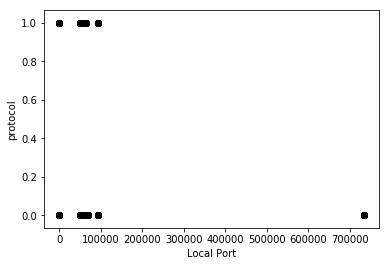

In [25]:
df_len =  min(len(lp_data),len(protocol_data),len(tc_data))

outlier_data = pd.DataFrame({'lp':lp_data[:df_len],'protocol':protocol_data[:df_len]})


plt.scatter(outlier_data["lp"],outlier_data["protocol"],c='black')
plt.xlabel('Local Port')
plt.ylabel('protocol')
plt.show()




### Isolation Forest :


https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

10    445
11    445
12    445
13    445
16    445
17    445
18    445
19    445
24    445
25    445
Name: lp, dtype: int64

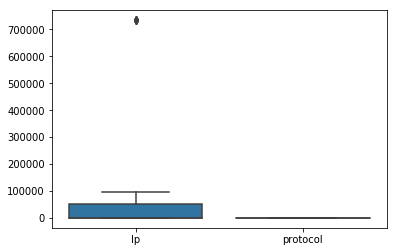

In [26]:
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1)




sns.boxplot(data=outlier_data)
clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 100, contamination= 'auto')
preds = clf.fit_predict(outlier_data)
outlier_data['Target']= preds 

data = outlier_data.iloc[outlier_data.Target.values !=-1]
data['lp'].head(10)

In [27]:
outlier_data.head(10)

,lp,protocol,Target
1,94444,0,-1
3,734034,0,-1
6,94444,0,-1
7,734034,0,-1
8,94444,0,-1
9,94444,0,-1
10,445,0,1
11,445,0,1
12,445,0,1
13,445,0,1


IP values with -1 are outliers and values with 1 are not outliers 

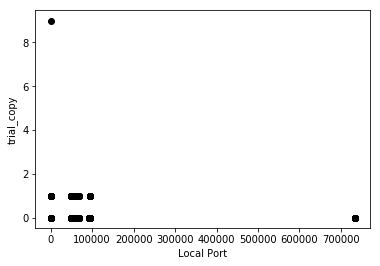

6     445
7     445
8     445
9     445
12    445
13    445
14    445
15    445
18    445
19    445
Name: lp, dtype: int64

In [28]:
outlier_tc = pd.DataFrame({'lp':lp_data[:df_len],'trial_copy':tc_data[:df_len]})

plt.scatter(outlier_tc["lp"],outlier_tc["trial_copy"],c='black')
plt.xlabel('Local Port')
plt.ylabel('trial_copy')
plt.show()

clf_tc = IsolationForest( behaviour = 'new', max_samples=100, random_state = 100, contamination= 'auto')
preds = clf_tc.fit_predict(outlier_tc)
outlier_tc['Target']= preds 

data = outlier_tc.iloc[outlier_tc.Target.values !=-1]
data['lp'].head(10)